In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
pd.set_option('max_rows', 5)
pd.set_option('max_columns', 9)
%matplotlib inline

# 重回帰分析

## 評価
---
**決定係数は説明変数の数 $k$ が増えるだけで数値が上昇**してしまうため、重回帰分析の当てはまりの評価には以下で定義される自由度調整済み決定係数を用いる。

$
\displaystyle \eta ^{2}_{f} =1-\frac
    {\displaystyle \frac
        {\displaystyle \sum ^{n}_{i=1}\left( y_{i} -\hat{y}_{i}\right)^{2}}
        {n-k-1}
    }
    {\displaystyle \frac
        {\displaystyle \sum ^{n}_{i=1}\left( y_{i} -\overline{y}\right)^{2}}
        {n-1}
    }
=1-\frac
    {n-1}
    {n-k-1}
\left( 1-\eta ^{2}\right)
$

In [2]:
from my_functions.multiple_regression_analysis import r2
r2.show()

interactive(children=(IntSlider(value=2, continuous_update=False, description='変数の数', min=2), Output()), _dom_…

## 回帰係数

**重回帰分析の回帰係数は、他の変数の影響を取り除いた[偏回帰係数](ordinary_least_squares.ipynb#%E5%81%8F%E5%9B%9E%E5%B8%B0%E4%BF%82%E6%95%B0-(partial-regression-coefficient))**である。基本的には他の変数を固定したときに、その変数を $1$ 動かしたときの目的変数の変化量と解釈できる。例えば、 $\displaystyle y=1+2x_{1} +3x_{2}$ ならば $x_{1}$ の回帰係数 $2$ は $x_{2}$ を固定して $x_{1}$ を $+1$ したときの変化量である。  
しかし変数が多くなってくると、ある変数を動いたときには他の変数も連動して動くのが通常であり、回帰係数の解釈は難しくなる。回帰係数の解釈が重要な場合には**説明変数は数個に抑える**。

### 共分散分析 (ANCOVA, Analysis of Covariance)
---
共分散分析は、共変量 (量的変数) の影響を取り除いた上で、[分散分析](../junior/generalized_linear_model.ipynb#%E5%88%86%E6%95%A3%E5%88%86%E6%9E%90-(ANOVA,-Analysis-of-Variance))を行うもの。  
一般化線形モデルの枠組みでは、説明変数に量的変数と質的変数の両方を持つ回帰分析と考えられる。

共分散分析は、一般化線形モデルでは以下のように表される。

<table class="text-center">
    <tr>
        <th>確率分布</th>
        <td class="text-left">正規分布 $\mathcal{N}\left( \mu ,\sigma ^{2}\right)$</td>
    </tr>
    <tr>
        <th>リンク関数</th>
        <td class="text-left">
            恒等関数 $g( x) =x$<br /><br />
            線形予測子からの変換 (リンク関数の逆関数) は<br />
            恒等関数 $f( x) =x$
        </td>
    </tr>
    <tr>
        <th>モデル式</th>
        <td class="text-left">
            $y_{i} \sim \mathcal{N}\left( z_{i} ,\sigma ^{2}\right)$<br />
            または<br />
            $
            \begin{cases}
                y_{i} =z_{i} +\epsilon \\
                \epsilon \sim \mathcal{N}\left( 0,\sigma ^{2}\right)
            \end{cases}
            $
        </td>
    </tr>
</table>

共分散分析は、量的変数の係数が等しいと仮定した上で回帰式の切片を比較していると考えられる。 (係数が異なる場合については[統計モデリング](statistical_modeling.ipynb)で扱う)

具体的に、3つのカテゴリ (赤・緑・青) を持つ質的変数 $x_{1}$ と量的変数 $x_{2}$ が1つずつの場合を考えてみる。  
$x$ をダミー変数にすると以下のようになる。

<table class="border">
    <tr>
        <th class="border-right-bold">$x_{1}$</th>
        <th>$dummy_{1}$ (緑を表す)</th>
        <th>$dummy_{2}$ (青を表す)</th>
    </tr>
    <tr>
        <td class="border-right-bold">赤</td>
        <td>0</td>
        <td>0</td>
    </tr>
    <tr>
        <td class="border-right-bold">緑</td>
        <td>1</td>
        <td>0</td>
    </tr>
    <tr>
        <td class="border-right-bold">青</td>
        <td>0</td>
        <td>1</td>
    </tr>
</table>

これに基づく回帰式は $y=a_{0} +a_{1} dummy_{1} +a_{2} dummy_{2} +a_{3} x_{2}$ になり、それぞれの値を代入してみると

<table class="text-center border">
    <tr>
        <th class="border-right-bold">$x$</th>
        <th style="min-width: 11.5em;">回帰式</th>
    </tr>
    <tr>
        <td class="border-right-bold">赤</td>
        <td class="text-left">$y=a_{0} +a_{3} x_{2}$</td>
    </tr>
    <tr>
        <td class="border-right-bold">緑</td>
        <td class="text-left">$y=a_{0} +a_{1} +a_{3} x_{2}$</td>
    </tr>
    <tr>
        <td class="border-right-bold">青</td>
        <td class="text-left">$y=a_{0} +a_{2} +a_{3} x_{2}$</td>
    </tr>
</table>

となる。

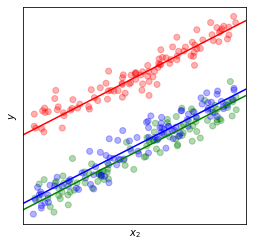

In [3]:
from my_functions.multiple_regression_analysis import ancova
ancova.show()

## 回帰係数の標本分布
---
回帰方程式 $y=a+bx+\epsilon$ の**誤差項 $\epsilon$ が正規分布に従うなら**、回帰係数の推定量 $\hat{b}$ も正規分布に従う。

より正確には、誤差項 $\epsilon_1,\ \epsilon_2,\dots,\ \epsilon_n$ が独立で共通の正規分布 $N(0, \sigma^2)$ に従うとすると、回帰係数の推定量 $\hat{b}$ は $
N\left(b,\ {\displaystyle \frac
    {\sigma ^{2}}
    {\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)^{2}}
} \right)
$ に従う。

証明

---

誤差項 $\epsilon_1,\ \epsilon_2,\dots,\ \epsilon_n$ が独立で共通の正規分布 $N(0,\ \sigma^2)$ に従うと仮定する。

$
\begin{align}
    \hat{b} & =\frac
        {Cov( x,y)}
        {V( x)}\\
    \\
     & =\frac
         {{\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)\left( y_{i} -\overline{y}\right)} }
         {{\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)^{2}} }
     \\
     \\
     & =\frac
         {{\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)\left( a+bx_{i} +\epsilon _{i} -\frac
             {1}
             {n}
         \sum ^{n}_{i=1}( a+bx_{i} +\epsilon _{i})\right)} }
         {{\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)^{2}} }
     \\
     \\
     & =\frac
         {{\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)\left( a+bx_{i} +\epsilon _{i} -a-b\overline{x} -\frac
             {1}
             {n}
         \sum ^{n}_{i=1} \epsilon _{i}\right)} }
         {{\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)^{2}} }
     \\
     \\
     & =\frac
         {{\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)\left( b\left( x_{i} -\overline{x}\right) +\epsilon _{i} -\frac
             {1}
             {n}
         \sum ^{n}_{i=1} \epsilon _{i}\right)} }
         {{\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)^{2}} }
     \\
     \\
     & =b+\frac
         {{\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right) \epsilon _{i}} }
         {{\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)^{2}} }
     -\frac
         {{\displaystyle \sum ^{n}_{i=1}\left\{\left( x_{i} -\overline{x}\right)\sum ^{n}_{i=1} \epsilon _{i}\right\}} }
         {{\displaystyle n\sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)^{2}} }
\end{align}
$

より、平均は

$
\begin{align}
    E\left(\hat{b}\right) & =E\left( b+\frac
        {{\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right) \epsilon _{i}} }
        {{\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)^{2}} }
    -\frac
        {{\displaystyle \sum ^{n}_{i=1}\left\{\left( x_{i} -\overline{x}\right)\sum ^{n}_{i=1} \epsilon _{i}\right\}} }
        {{\displaystyle n\sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)^{2}} }\right)
    \\
    \\
     & =b+\frac
         {{\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right) E( \epsilon _{i})} }
         {{\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)^{2}} }
     -\frac
         {{\displaystyle \sum ^{n}_{i=1}\left\{\left( x_{i} -\overline{x}\right)\sum ^{n}_{i=1} E( \epsilon _{i})\right\}} }
         {{\displaystyle n\sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)^{2}} }
     \\
     \\
     & =b\ \because E( \epsilon _{i}) =0
\end{align}
$

分散は

$
\begin{align}
    V\left(\hat{b}\right) & =E\left(\left(\hat{b} -E\left(\hat{b}\right)\right)^{2}\right)\\
     \\
     & =E\left(\left(\hat{b} -b\right)^{2}\right)\\
     \\
     & =E\left(\left(\frac
         {{\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right) \epsilon _{i}} }
         {{\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)^{2}} }
     -\frac
         {{\displaystyle \sum ^{n}_{i=1}\left\{\left( x_{i} -\overline{x}\right)\sum ^{n}_{i=1} \epsilon _{i}\right\}} }
         {{\displaystyle n\sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)^{2}} }\right)^{2}\right)
     \\
     \\
     & =E\left(\left(\frac
         {{\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right) \epsilon _{i}} }
         {{\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)^{2}} }
     \right)^{2} -2\frac
         {{\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right) \epsilon _{i}} }
         {{\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)^{2}} }
     \cdot \frac
         {{\displaystyle \sum ^{n}_{i=1}\left\{\left( x_{i} -\overline{x}\right)\sum ^{n}_{i=1} \epsilon _{i}\right\}} }
         {{\displaystyle n\sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)^{2}} }
     +\left(\frac
         {{\displaystyle \sum ^{n}_{i=1}\left\{\left( x_{i} -\overline{x}\right)\sum ^{n}_{i=1} \epsilon _{i}\right\}} }
         {{\displaystyle n\sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)^{2}} }
     \right)^{2}\right)\\
     \\
     & =E\left(\left(\frac
         {{\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right) \epsilon _{i}} }
         {{\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)^{2}} }
     \right)^{2}\right) \ \because E\left(\sum ^{n}_{i=1} \epsilon _{i}\right) =0\\
     \\
     & =E\left(\frac
         {{\displaystyle \sum ^{n}_{i=1}\sum ^{n}_{j=1}\left( x_{i} -\overline{x}\right)\left( x_{j} -\overline{x}\right) \epsilon _{i} \epsilon _{j}} }
         {\left({\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)^{2}} \right)^{2}}\right)
\end{align}
$

ここで、 $i\neq j$ のとき $Cov( \epsilon _{i} ,\ \epsilon _{j}) =E(( \epsilon _{i} -E( \epsilon _{i}))( \epsilon _{j} -E( \epsilon _{j}))) =E( \epsilon _{i} \epsilon _{j})$ かつ $\epsilon _{1},\ \epsilon _{2},\dots ,\ \epsilon _{n}$ は独立なので $Cov( \epsilon _{i} ,\ \epsilon _{j}) =0$

$V( \epsilon _{i}) =E\left( \epsilon ^{2}_{i}\right) -E( \epsilon _{i})^{2} =E\left( \epsilon ^{2}_{i}\right)$ かつ $\epsilon _{i}$ は $N(0,\ \sigma^2)$ に従うので、 $V( \epsilon _{i}) =\sigma^2$

したがって

$
\begin{align}
    V\left(\hat{b}\right) & =E\left(\frac
        {{\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)^{2} \epsilon ^{2}_{i}} }
        {\left({\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)^{2}} \right)^{2}}\right)
    \\
     \\
     & =E\left(\frac
         {{\displaystyle \sum ^{n}_{i=1} \epsilon ^{2}_{i}} }
         {{\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)^{2}} }\right)
     \\
     \\
     & =\frac
         {\sigma ^{2}}
         {{\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)^{2}} }
\end{align}
$

さらに $
\hat{b} =b+\frac
    {{\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right) \epsilon _{i}} }
    {{\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)^{2}} }
-\frac
    {{\displaystyle \sum ^{n}_{i=1}\left\{\left( x_{i} -\overline{x}\right)\sum ^{n}_{i=1} \epsilon _{i}\right\}} }
    {{\displaystyle n\sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)^{2}} }
$ より、 $\hat{b}$ は正規分布に従う $\epsilon _{i}$ の線形関数なので、 $\hat{b}$ も正規分布に従う。

以上より、回帰係数 $\hat{b}$ の標本分布は $
N\left(b,\ \frac
    {{\displaystyle \sigma ^{2}}}
    {{\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)^{2}} }
\right)$ に従う。

---

## 区間推定
---
標本分布が正規分布なので、正規分布の区間推定と同様に $t$ 分布を利用する。

単回帰分析の信頼区間の表示は`seaborn.regplot`で可能。具体的な $x$ の値に対応した上限・下限は自分で計算しないといけない。  
予測区間は`statsmodels.sandbox.regression.predstd.wls_prediction_std`を使用する。  
基本的には R のパッケージ (lm など) を使うほうが簡単。

パッケージを使う場合は信頼区間 (confidence interval) と予測区間 (prediction interval) の違いに気をつける。

<table class="border">
    <tr class="text-center background-dark">
        <th class="border-right-bold" style="min-width: 5.5em;"></th>
        <th>概要</th>
        <th>回帰分析での例</th>
    </tr>
    <tr class="text-left background-bright">
        <th class="text-center background-dark border-right-bold border-bottom">信頼区間</th>
        <td>標本抽出を繰り返して母数 (母平均や母回帰係数など) を推定すると一定割合 (95%など) の予測値が収まると考えられる区間</td>
        <td>回帰係数 $a,\ b$ の推定量 $\hat{a},\ \hat{b}$ の推定区間</td>
    </tr>
    <tr class="text-left background-bright">
        <th class="text-center background-dark border-right-bold border-bottom">予測区間</th>
        <td>標本抽出を繰り返すと一定割合 (95%など) の標本が入ると考えられる区間</td>
        <td>$\epsilon$ の分散 $\sigma ^2$ の推定量 $s^2$ の推定区間</td>
    </tr>
</table>

In [4]:
from my_functions.multiple_regression_analysis import interval
interval.show()

interactive(children=(FloatSlider(value=0.05, continuous_update=False, description='信頼区間の係数', max=0.5, min=0.0…

区間予測の精度が高ければ、結果を利用して価格変動に対する保険商品を設計することも考えられる。 ([参考](https://jp.techcrunch.com/2006/11/14/farecast-selling-airline-ticket-price-guarantees/))

## 回帰係数の検定
---
回帰係数の検定は、主に独立変数が従属変数を説明できているか (回帰方程式の傾きが 0 でないか) を確かめるために利用される。

回帰係数 $b$ の推定量 $\hat{b}$ についての検定は、誤差項 $\epsilon$ の標準誤差 $
s ={\displaystyle \sqrt{
    \frac
        {{\displaystyle
            \sum ^{n}_{i=1} e^{2}_{i}
        } }
        {n-2}
}}
$ とおくと、次の統計量 $t$ が自由度 $n-2$ の $t$ 分布 $t(n-2)$ に従うことを利用する。 (単回帰の場合)

$
t={\displaystyle
    \frac
        {\hat{b} -b_{0}}
        {\displaystyle \sqrt{
            \frac
                {s^{2}}
                {\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)^{2}}
        }}
}
$

回帰方程式の傾きが 0 でないかを確かめるので、 $b_{0} =0$ が帰無仮説。

証明

---

誤差項 $\epsilon$ の分散 $\sigma^2$ の不偏推定量は $
s^2=\displaystyle \frac
    {\displaystyle \sum_{i=1}^{n}e^{2}_{i}}
    {n-2}
$ 。 (証明は省略)

$\hat{b}$ を標準化した $
Z=\displaystyle \frac
    {\hat{b} -\overline{b}}
    {\displaystyle \sqrt{
        \frac
            {\sigma ^{2}}
            {{\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)^{2}}}
    }}
$ の $\sigma^{2}$ が未知なので、 $s^{2}$ で置き換えた統計量 $t$ は

$
\begin{align}
    t & ={\displaystyle \frac
        {\hat{b} -\overline{b}}
        {\displaystyle \sqrt{
            \frac
                {s^{2}}
                {\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)^{2}}
        }}
    } \\
     \\
     & =\frac
         {\displaystyle \frac
             {\hat{b} -\overline{b}}
             {\sqrt{
                 \displaystyle \frac
                     {\sigma ^{2}}
                     {\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)^{2}}
             }}
         }
         {\frac
             {\displaystyle \sqrt{
                 \frac
                     {s^{2}}
                     {\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)^{2}}
             }}
             {\sqrt{
                 \displaystyle \frac
                     {\sigma ^{2}}
                     {\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)^{2}}
             }}
         }
     \\
     \\
     & =\frac
         {Z}
         {\displaystyle \sqrt{
             \frac
                 {\sigma ^{2}}
                 {s^{2}}
         }}
     \\
     \\
     & =\frac
         {Z}
         {\displaystyle \sqrt{
             \frac
                 {1}
                 {n-2}
             \frac
                 {( n-2) \sigma ^{2}}
                 {s^{2}}
         }}
     \\
     \\
     & =\frac
         {Z}
         {\displaystyle \sqrt{
             \frac
                 {1}
                 {n-2}
         \chi ^{2}}}
\end{align}
$

より、自由度 $n-2$ の $t$ 分布に従う。

これを利用して回帰係数 $b$ の推定量 $\hat{b}$ について $t$ 検定を行う。

---

### Pythonでの検定の実行方法
---
`statsmodels.regression.linear_model.OLS`を用いる。`summary`にあるそれぞれの変数の P>|t| が $t$ 検定の $p$ 値。 $F$ 統計量 (F-statistic) は全ての係数が 0 であるかどうかの検定統計量。  
標準では切片項が入らないので、`statsmodels.tools.tools.add_constant`で追加する。

In [5]:
help(sm.OLS)

Help on class OLS in module statsmodels.regression.linear_model:

class OLS(WLS)
 |  OLS(endog, exog=None, missing='none', hasconst=None, **kwargs)
 |  
 |  Ordinary Least Squares
 |  
 |  Parameters
 |  ----------
 |  endog : array_like
 |      A 1-d endogenous response variable. The dependent variable.
 |  exog : array_like
 |      A nobs x k array where `nobs` is the number of observations and `k`
 |      is the number of regressors. An intercept is not included by default
 |      and should be added by the user. See
 |      :func:`statsmodels.tools.add_constant`.
 |  missing : str
 |      Available options are 'none', 'drop', and 'raise'. If 'none', no nan
 |      checking is done. If 'drop', any observations with nans are dropped.
 |      If 'raise', an error is raised. Default is 'none'.
 |  hasconst : None or bool
 |      Indicates whether the RHS includes a user-supplied constant. If True,
 |      a constant is not checked for and k_constant is set to 1 and all
 |      result s

In [6]:
boston = pd.read_csv('data/boston.csv')
print('boston')
display(boston)

boston


,犯罪率,住宅地割合,非小売業種割合,河川への隣接,...,生徒と教師の比率,黒人比率,低所得層割合,中央価格
0,0.00632,18.0,2.31,0,...,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,...,17.8,396.90,9.14,21.6
...,...,...,...,...,...,...,...,...,...
504,0.10959,0.0,11.93,0,...,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,...,21.0,396.90,7.88,11.9


In [7]:
x = sm.add_constant(boston.iloc[:, :-1])
y = boston.iloc[:, -1]
model = sm.OLS(y, x)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   中央価格   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 23 May 2020   Prob (F-statistic):          6.72e-135
Time:                        14:12:50   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          36.4595      5.103      7.144      0.000      26.432      46.487
犯罪率            -0.1080      0.033     -3.287      0.001      -0.173      -0.043
住宅地割合           0.0464      0.014      3.382      0.001       0.019       0.073
非小売業種割合         0.0206      0.061      0.334      0.738      -0.100       0.141
河川への隣接          2.6867      0.862      3.118      0.002       0.994       4.380
窒素酸化物濃度       -17.7666      3.820     -4.651      0.000     -25.272     -10.262
平均部屋数           3.8099      0.418      9.116      0.000       2.989       4.631
古い持ち家割合         0.0007      0.013      0.052      0.958      -0.025       0.027
雇用センターまでの距離    -1.4756      0.199     -7.398      0.000      -1.867      -1.084
高速道路へのアクセス      0.3060      0.066      4.613      0.000       0.176       0.436
固定資産税率         -0.0123      0.004     -3.280      0.001      -0.020      -0.005
生徒と教師の比率       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
黒人比率            0.0093      0.003      3.467      0.001       0.004       0.015
低所得層割合         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

練習問題

---
`diamonds`データセットに対して、`price(log)`を目的変数・`carat(log)`と`color`を説明変数として共分散分析を実行し、`color`の違いによって`price(log)`に有意水準 $5\%$ で差があると言えるかどうか検定する。

In [8]:
diamonds = sns.load_dataset('diamonds')
diamonds = diamonds.query('color in ["D", "J"]')
diamonds = diamonds.sample(500, random_state=1234)
diamonds['carat(log)'] = np.log(diamonds['carat'])
diamonds['price(log)'] = np.log(diamonds['price'])
print('diamonds')
display(diamonds)

diamonds


,carat,cut,color,clarity,...,y,z,carat(log),price(log)
35459,0.43,Premium,D,VS2,...,4.93,2.93,-0.843970,6.803505
4433,0.73,Ideal,D,SI1,...,5.83,3.57,-0.314711,8.192847
...,...,...,...,...,...,...,...,...,...
22555,1.35,Ideal,D,VS2,...,7.13,4.36,0.300105,9.268798
3295,0.74,Premium,D,VS1,...,5.77,3.63,-0.301105,8.121183


解答例

---

In [9]:
model = sm.GLM(
    diamonds['price(log)'],
    sm.add_constant(
        pd.concat([
            diamonds['carat(log)'],
            pd.get_dummies(diamonds['color'], drop_first=True)
        ],
                  axis='columns'))).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             price(log)   No. Observations:                  500
Model:                            GLM   Df Residuals:                      497
Model Family:                Gaussian   Df Model:                            2
Link Function:               identity   Scale:                        0.058850
Method:                          IRLS   Log-Likelihood:                0.22485
Date:                Sat, 23 May 2020   Deviance:                       29.249
Time:                        14:12:52   Pearson chi2:                     29.2
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.5827      0.017    503.893      0.000       8.549       8.616
carat(log)     1.7681      0.020     89.372      0.000       1.729       1.807
J             -0.4572      0.025    -18.090      0.000      -0.507      -0.408
==============================================================================
"""

`color(J)`の $p< 0.05$ より、差があると言える。

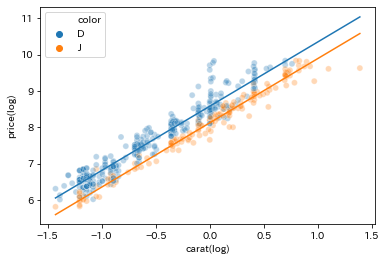

In [10]:
sns.scatterplot('carat(log)', 'price(log)', 'color', data=diamonds, alpha=0.3)
carat = diamonds['carat(log)']
x_range = np.array([carat.min(), carat.max()])
slope = model.params['carat(log)']

for i in range(2):
    intercept = model.params['const'] + model.params['J'] * i
    plt.plot(x_range, slope * x_range + intercept)
plt.show()

---

## 推薦図書
---
- [心理統計学の基礎―統合的理解のために](https://www.amazon.co.jp/%E5%BF%83%E7%90%86%E7%B5%B1%E8%A8%88%E5%AD%A6%E3%81%AE%E5%9F%BA%E7%A4%8E%E2%80%95%E7%B5%B1%E5%90%88%E7%9A%84%E7%90%86%E8%A7%A3%E3%81%AE%E3%81%9F%E3%82%81%E3%81%AB-%E6%9C%89%E6%96%90%E9%96%A3%E3%82%A2%E3%83%AB%E3%83%9E-%E5%8D%97%E9%A2%A8%E5%8E%9F-%E6%9C%9D%E5%92%8C/dp/4641121605/)
- [Rによるやさしい統計学](https://www.amazon.co.jp/R%E3%81%AB%E3%82%88%E3%82%8B%E3%82%84%E3%81%95%E3%81%97%E3%81%84%E7%B5%B1%E8%A8%88%E5%AD%A6-%E5%B1%B1%E7%94%B0-%E5%89%9B%E5%8F%B2/dp/4274067106/)